In [1]:
from google.colab import files


uploaded = files.upload()


Saving AirPassengers.csv to AirPassengers.csv


In [2]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [3]:
data=pd.read_csv(io.BytesIO(uploaded['AirPassengers.csv']))

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)

<ipython-input-5-9b71f5305629>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)


In [6]:
IndexData=data.set_index(['Month'])

In [7]:
from datetime import datetime
IndexData.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


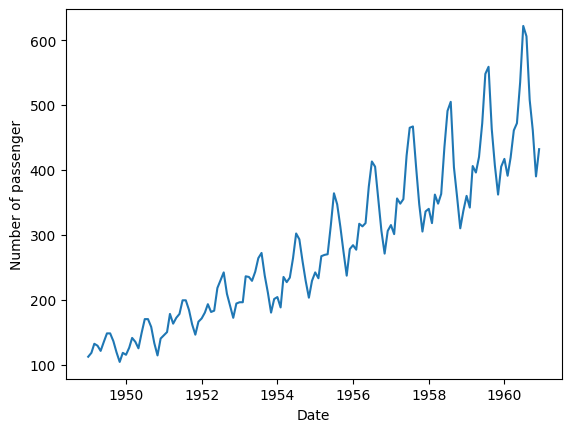

In [8]:
plt.xlabel('Date')
plt.ylabel('Number of passenger')
plt.plot(IndexData)

In [9]:
rolmean=IndexData.rolling(window=12).mean()
rolstd=IndexData.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


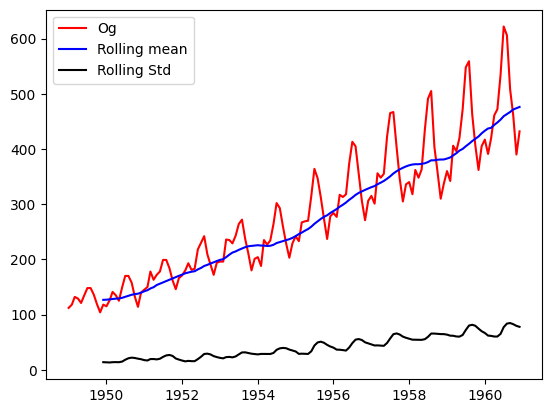

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [10]:
from statsmodels.tsa.stattools import adfuller

#rolling stat
orginal=plt.plot(IndexData, color='red', label ='Og')
mean=plt.plot(rolmean, color='blue', label="Rolling mean")
std=plt.plot(rolstd, color='black', label="Rolling Std")
plt.legend(loc='best')
plt.show()
print('Results of Dickey-Fuller Test:')
dftest = adfuller(IndexData, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# we use # conclude the data is not stationary

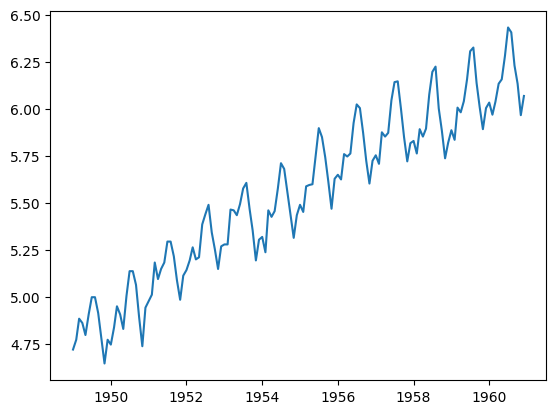

In [11]:
# we use the log
IndexData_logScale=np.log(IndexData)
plt.plot(IndexData_logScale)

In [12]:
Movingavg= IndexData_logScale.rolling(window=12).mean()
movingstd= IndexData_logScale.rolling(window=12).mean()

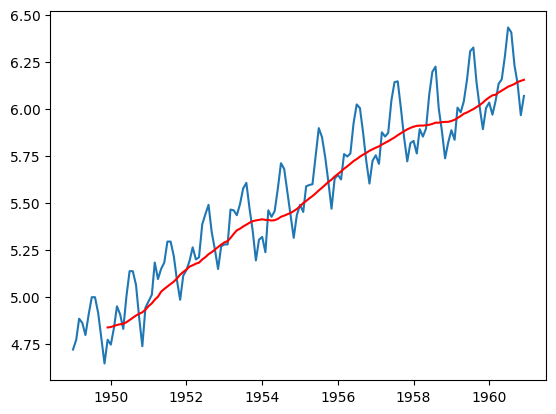

In [13]:
plt.plot(IndexData_logScale)
plt.plot(Movingavg, color='red')

# mean is not stationary as it moves with time

In [14]:
# for getting time series as stationary
dataset_Log_minus_moving_avg= IndexData_logScale-Movingavg
dataset_Log_minus_moving_avg.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [15]:
# rempove nan
dataset_Log_minus_moving_avg.dropna(inplace=True)
dataset_Log_minus_moving_avg.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


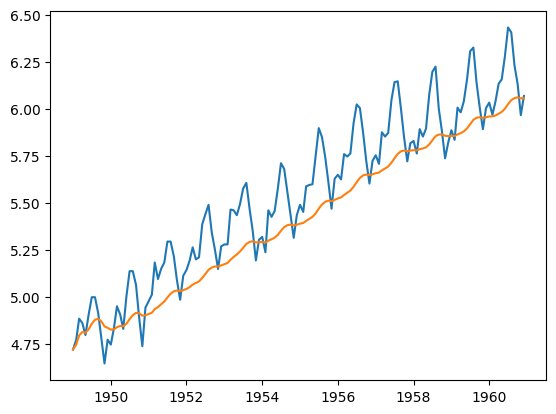

In [16]:
 exponential_decay_weighted_avg=IndexData_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
 plt.plot(IndexData_logScale)
 plt.plot(exponential_decay_weighted_avg)

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(IndexData_logScale)

trend= decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.resid

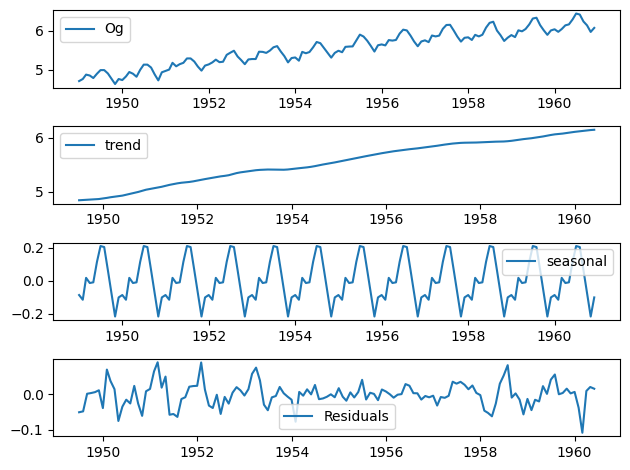

In [18]:
plt.subplot(411)
plt.plot(IndexData_logScale, label='Og')
plt.legend(loc='best')
plt.subplot(412)

plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)

plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)

plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [19]:
!pip install --upgrade statsmodels

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


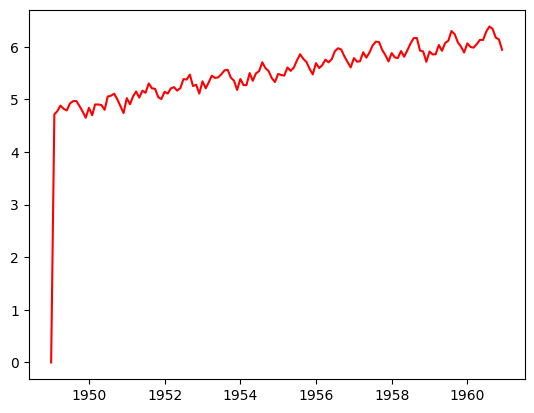

In [20]:
from statsmodels.tsa.arima.model import ARIMA

#AR Model

model= ARIMA(IndexData_logScale, order=(2,1,2))
results_AR=model.fit()
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS:%.4f'% sum(results_AR.fittedvalues- IndexData_logScale))

In [21]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
#defining a helper fucntion for plotting time series data
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

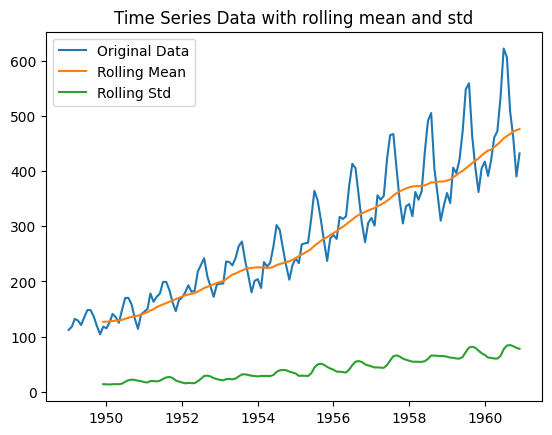

In [22]:
def plot_graph(timeseries):
    rolling_avg = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    original_data = plt.plot(timeseries, label="Original Data")
    mean = plt.plot(rolling_avg, label="Rolling Mean")
    std = plt.plot(rolling_std, label="Rolling Std")

    plt.legend(loc="best")
    plt.title("Time Series Data with rolling mean and std")
    plt.show

plot_graph(IndexData)

In [23]:
def check_if_data_is_stationary(ts_data):
    df_test = adfuller(ts_data)
    output = pd.Series(df_test[0:4], index=["Test statistic","p-value", "usedlag", "NOBS" ])

    print(output)

check_if_data_is_stationary(IndexData)

Test statistic      0.815369
p-value             0.991880
usedlag            13.000000
NOBS              130.000000
dtype: float64


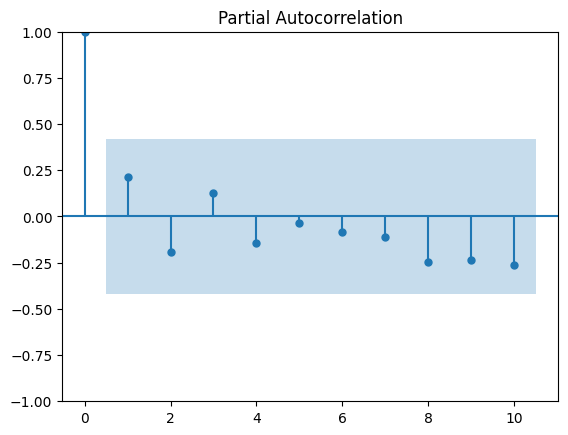

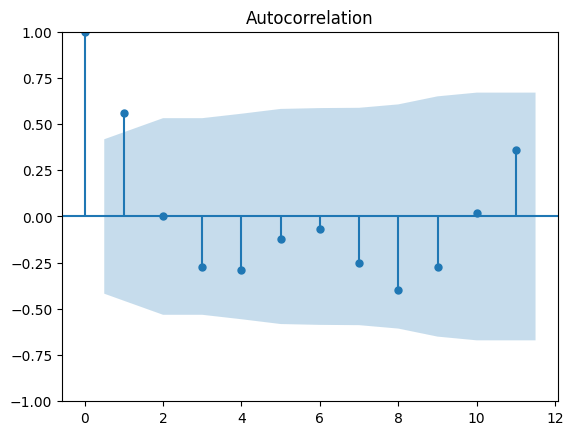

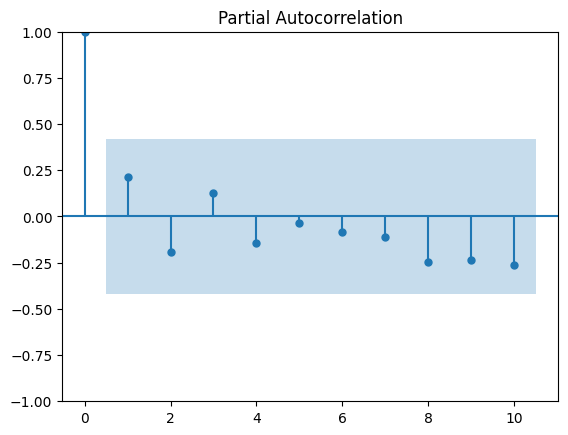

In [24]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


log_scaled_df_rolling_mean = IndexData_logScale.rolling(window=3).mean()
scaled_data = IndexData_logScale - log_scaled_df_rolling_mean
scaled_data.dropna(inplace=True)



lag_acf = acf(scaled_data)
lag_pacf = pacf(scaled_data)

plot_acf(lag_acf)
plot_pacf(lag_pacf, lags=10)

Moving Average (q value) = 2 (from acf graph) Auto-regressive (p value) = 1 (from pacf graph) Differentiation (d value) = 2 (from the window, period value) We have now removed the ets (error, trend, seasonality)

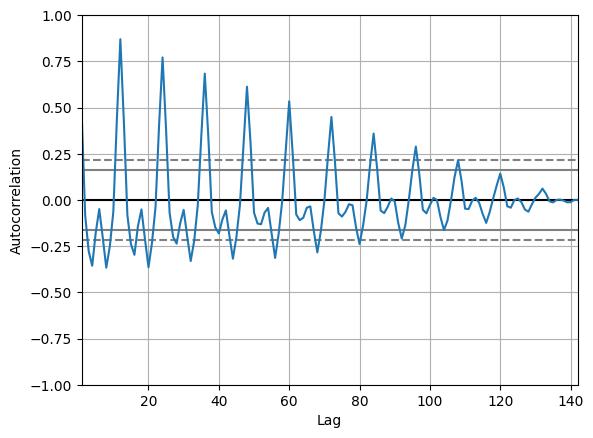

In [25]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(scaled_data)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

train, test = train_test_split(scaled_data, test_size=0.1, shuffle=False)
model_arima = ARIMA(train, order=(15,2,1))
model_fit = model_arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

<Axes: ylabel='Density'>

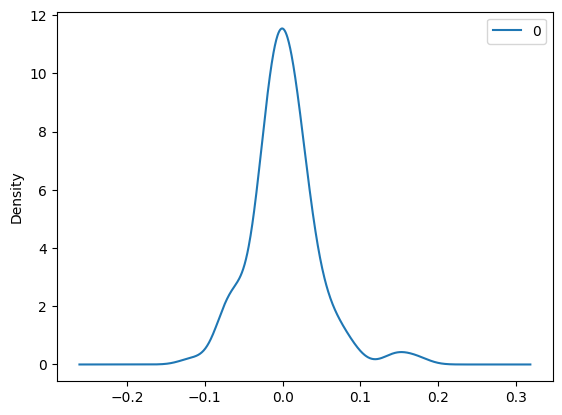

In [27]:
residual = pd.DataFrame(model_fit.resid)
residual.plot(kind="kde")

It can be observed that the peak is narrowing arround 0. The closer a data point's residual is to 0, the better the fit.

In [28]:
preds = model_fit.predict(start='1959-10-01', end='1960-12-01')

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

score = r2_score(test, preds)
error = mean_squared_error(test, preds)

print(f"R2 score: {score}")
print(f"Mean squared error: {error:.5f}")

R2 score: 0.9237353894268392
Mean squared error: 0.00067


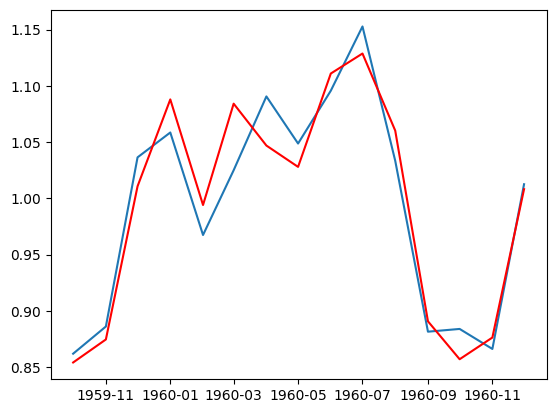

In [30]:
test_set = np.exp(test)
predictions = np.exp(preds)

plt.plot(test_set)
plt.plot(predictions, color="red")
plt.show()

I tried a range of p values (0 to 20). It can be observed that the model is giving 92% accurate predictions at p value = 15.